In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [49]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'sam-resources/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,CityName,StateName,MedianSalePrice,Year,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2011-03-31,New York,NY,340000.0,2011,8128980.0,51270.0,4.86,9.465709,74.331706
1,2011-03-31,Los Angeles,CA,350000.0,2011,3782544.0,50028.0,4.86,10.333792,70.458728
2,2011-03-31,Chicago,IL,160000.0,2011,2700741.0,47371.0,4.86,12.033569,145.942664
3,2011-03-31,Dallas,TX,139000.0,2011,1196258.0,42259.0,4.86,8.496011,149.862894
4,2011-03-31,Houston,TX,140695.0,2011,2089090.0,44124.0,4.86,8.393871,154.591607


In [50]:
dfn = pd.read_csv('sam-resources/dfn.csv')
dfn.head()

,Date,CityName,StateName,MedianSalePrice,Year,SalesTotal,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2009-04-30,New York,NY,339000.0,2009,6974.0,NaN,50173.0,4.78,NaN,73.630547
1,2009-04-30,Los Angeles,CA,320000.0,2009,8168.0,NaN,48570.0,4.78,NaN,75.510228
2,2009-04-30,Chicago,IL,192000.0,2009,5582.0,NaN,46781.0,4.78,NaN,121.214878
3,2009-04-30,Dallas,TX,140000.0,2009,4811.0,NaN,41266.0,4.78,NaN,146.639845
4,2009-04-30,Houston,TX,145000.0,2009,3841.0,NaN,42797.0,4.78,NaN,146.836147


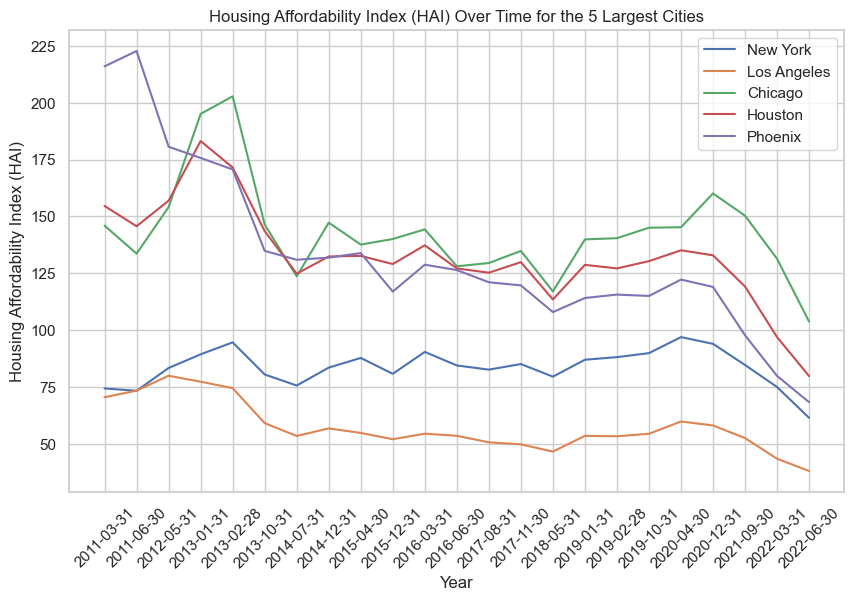

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
      dtype=object)

In [51]:
# Finding the 5 largest cities by population
# We will use the latest available year for each city to determine its population size.
latest_year = data['Year'].max()
largest_cities = data[data['Year'] == latest_year].nlargest(9, 'Total Population')['CityName'].unique()

# Extracting data for the 5 largest cities
largest_cities_data = data[data['CityName'].isin(largest_cities)]

# Creating a line plot of the HAI over time for these cities
plt.figure(figsize=(10, 6))
for city in largest_cities:
    city_data = largest_cities_data[largest_cities_data['CityName'] == city]
    plt.plot(city_data['Date'], city_data['HAI'], label=city)

plt.title('Housing Affordability Index (HAI) Over Time for the 5 Largest Cities')
plt.xlabel('Year')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Returning the names of the 5 largest cities
largest_cities


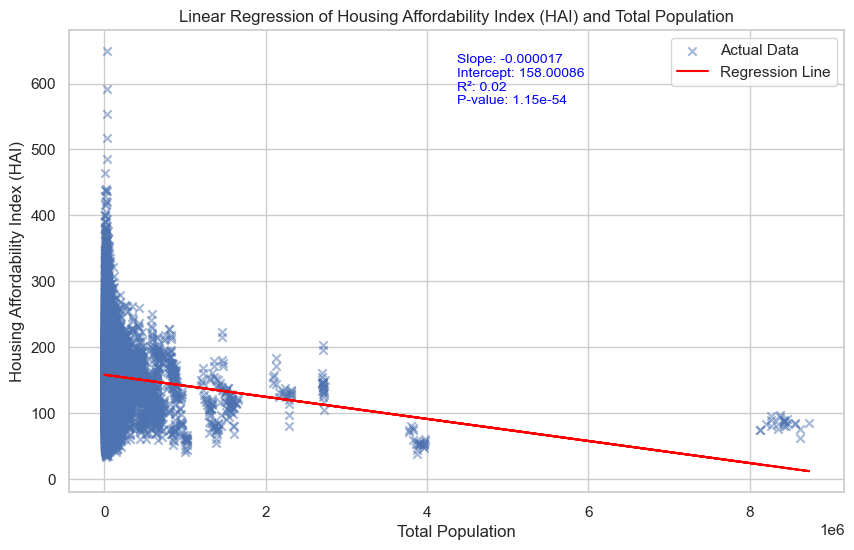

In [64]:
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has the columns 'Total Population' and 'HAI'

# Calculating the linear regression using scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Total Population'], data['HAI'])

# Generating y values for the regression line
line = slope * data['Total Population'] + intercept

# Plotting the linear regression
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Population'], data['HAI'], alpha=0.5, label='Actual Data', marker='x')
plt.plot(data['Total Population'], line, color='red', label='Regression Line')

# Displaying regression data on the plot
plt.text(0.5, 0.95, f'Slope: {slope:.6f}\nIntercept: {intercept:.5f}\nR²: {r_value**2:.2f}\nP-value: {p_value:.2e}', 
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=10, color='blue')

plt.title('Linear Regression of Housing Affordability Index (HAI) and Total Population')
plt.xlabel('Total Population')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.show()


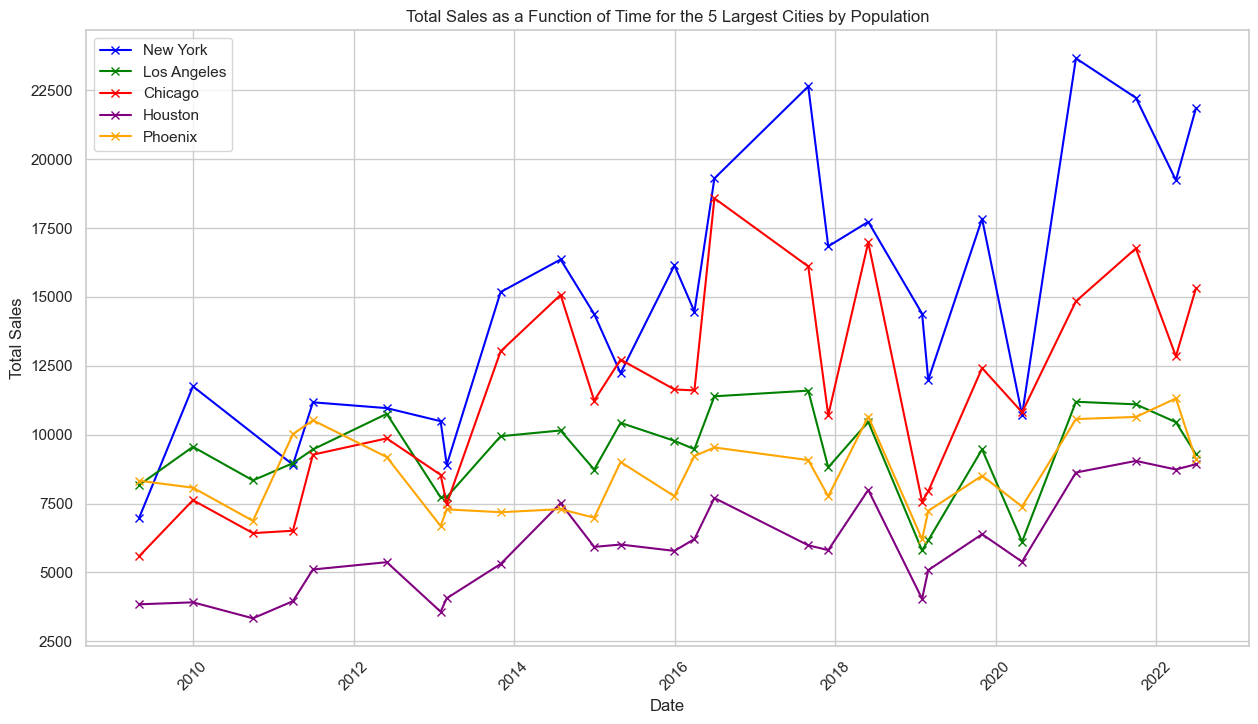

In [56]:

# Assuming 'dfn' is your DataFrame
# Convert 'Date' to datetime format
dfn['Date'] = pd.to_datetime(dfn['Date'])

# Identifying the 5 largest cities by population
largest_cities_5 = dfn.groupby('CityName')['Total Population'].max().sort_values(ascending=False).head(5).index

# Filtering the data for these 5 cities
largest_cities_data_5 = dfn[dfn['CityName'].isin(largest_cities_5)]

# Grouping by Date and City for total sales, then resetting the index
sales_over_time_cities_5 = largest_cities_data_5.groupby(['Date', 'CityName'])['SalesTotal'].sum().reset_index()

# Sorting the data by CityName and then by Date
sales_over_time_cities_5 = sales_over_time_cities_5.sort_values(by=['CityName', 'Date'])

# Colors for 5 cities
colors_5 = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting
plt.figure(figsize=(15, 8))
for i, city in enumerate(largest_cities_5):
    city_data = sales_over_time_cities_5[sales_over_time_cities_5['CityName'] == city]
    plt.plot(city_data['Date'], city_data['SalesTotal'], label=city, color=colors_5[i], marker='x')

plt.title('Total Sales as a Function of Time for the 5 Largest Cities by Population')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/data.csv'

In [ ]:
# Importing necessary libraries for analysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Setting up the visualization style
sns.set(style="whitegrid")

# Analysis 1: Trend Analysis over Time
# We will look at the median sale price trends over time.
median_sale_price_trends = data.groupby('Year')['MedianSalePrice'].mean()

# Analysis 2: Correlation Analysis
# We will calculate the Pearson correlation coefficients between several pairs of variables.
correlation_data = data[['MedianSalePrice', 'Total Population', 'Median Income', 'MORTGAGE30US', 'Unemployment Rate', 'HAI']]
correlation_matrix = correlation_data.corr()

# Analysis 3: Comparison Between Cities
# We will focus on a few major cities for comparison purposes.
selected_cities = ['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston']
city_comparison_data = data[data['CityName'].isin(selected_cities)].groupby(['CityName', 'Year']).mean()

# Plotting the results
plt.figure(figsize=(15, 5))

# Trend Analysis Plot
plt.subplot(1, 3, 1)
plt.plot(median_sale_price_trends, marker='o')
plt.title('Median Sale Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=45)

# Correlation Matrix Heatmap
plt.subplot(1, 3, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')

# Comparison Between Cities Plot
plt.subplot(1, 3, 3)
for city in selected_cities:
    plt.plot(city_comparison_data.loc[city]['MedianSalePrice'], label=city)
plt.title('Median Sale Price Comparison Between Cities')
plt.xlabel('Year')
plt.ylabel('Median Sale Price')
plt.legend()
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Returning the correlation matrix for detailed analysis
correlation_matrix


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/mnt/data/data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
data.head()


['Date',
 'Name',
 'State',
 'MedianSalePrice',
 'Year',
 'Total Population',
 'Total Labor Force',
 'Unemployed Labor Force',
 'Median Income',
 'MORTGAGE30US',
 'Unemployment Rate',
 'HAI']

In [ ]:
len(df.dropna())

792

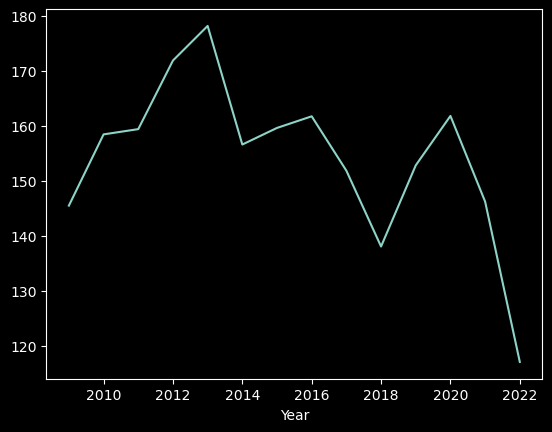

In [ ]:
# Line plot of the average housing affordability index by year
df.groupby('Year')['HAI'].mean().plot()
plt.show()


In [ ]:
# Load new data
df2 = pd.read_csv('sam-resources/census_data_2009-2022ksada.csv')

df2.head()

,City,Total Population,Total Labor Force,Unemployed Labor Force,Median Income,Year
0,"Pine Flat CDP, CA",114,22.0,4.0,15724.0,2011
1,"Pine Grove CDP, CA",2573,1098.0,64.0,52917.0,2011
2,"Pine Mountain Lake CDP, CA",2695,942.0,100.0,54200.0,2011
3,"Piñon Hills CDP, CA",6130,2510.0,503.0,38140.0,2011
4,"Pioneer CDP, CA",1226,621.0,109.0,42917.0,2011
